**Lineaarinen regressio kotimaan ja ulkomaan matkoista, jotka tässä käsitelty yhdessä, aineisto normalisoitu**

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:

df = pd.read_excel("YO_0_linregr_01.xlsx")
df.head()

,majoitusmuoto,matkakohde,matkan tarkoitus,matkan tyyppi,vuosi,matkat yön yli lkm tuhansia,yöpymiset lkm tuhansia,matkan ka kesto yötä,matkan med kesto yötä
0,Yhteensä KOTI VA,1,1,11,1,26770,73470,2.7,2
1,Yhteensä KOTI T,1,2,12,1,4140,8270,2.0,1
2,Yhteensä ULKO VA,2,1,21,1,7100,43610,6.1,4
3,Yhteensä ULKO T,2,2,22,1,1950,9780,5.0,2
4,Yhteensä KOTI VA,1,1,11,2,26530,75620,2.9,2


In [ ]:
df.dtypes

majoitusmuoto                   object
matkakohde                       int64
matkan tarkoitus                 int64
matkan tyyppi                    int64
vuosi                            int64
matkat yön yli lkm tuhansia      int64
yöpymiset lkm tuhansia           int64
matkan ka kesto yötä           float64
matkan med kesto yötä            int64
dtype: object

In [ ]:

df.describe()

,matkakohde,matkan tarkoitus,matkan tyyppi,vuosi,matkat yön yli lkm tuhansia,yöpymiset lkm tuhansia,matkan ka kesto yötä,matkan med kesto yötä
count,40.00000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,1.50000,1.50000,16.500000,5.500000,9179.750000,32354.000000,4.312500,2.375000
std,0.50637,0.50637,5.088952,2.908872,9914.195854,29819.668763,2.266726,1.004796
min,1.00000,1.00000,11.000000,1.000000,280.000000,2100.000000,1.800000,1.000000
25%,1.00000,1.00000,11.750000,3.000000,1957.500000,7212.500000,2.800000,2.000000
50%,1.50000,1.50000,16.500000,5.500000,3905.000000,12760.000000,3.900000,2.000000
75%,2.00000,2.00000,21.250000,8.000000,11022.500000,52862.500000,5.825000,3.000000
max,2.00000,2.00000,22.000000,10.000000,27720.000000,97450.000000,11.400000,5.000000


In [ ]:
#poistettu majoitusmuoto -muuttuja
df1 = df.iloc[:,1:]
df1.head()

,matkakohde,matkan tarkoitus,matkan tyyppi,vuosi,matkat yön yli lkm tuhansia,yöpymiset lkm tuhansia,matkan ka kesto yötä,matkan med kesto yötä
0,1,1,11,1,26770,73470,2.7,2
1,1,2,12,1,4140,8270,2.0,1
2,2,1,21,1,7100,43610,6.1,4
3,2,2,22,1,1950,9780,5.0,2
4,1,1,11,2,26530,75620,2.9,2


**Tehty normalisointi muuttujille MinMaxScaler avulla.**

In [ ]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1 = scaler.fit_transform(df1)

In [ ]:

df1 = pd.DataFrame(df1, columns =['matkakohde', 'matkan tarkoitus', 'matkan tyyppi', 'vuosi', 'matkat yön yli lkm tuhansia', 'yöpymiset lkm tuhansia', 'matkan ka kesto yötä', 'matkan med kesto yötä'])
df1.head()

,matkakohde,matkan tarkoitus,matkan tyyppi,vuosi,matkat yön yli lkm tuhansia,yöpymiset lkm tuhansia,matkan ka kesto yötä,matkan med kesto yötä
0,0.0,0.0,0.000000,0.000000,0.965379,0.748506,0.093750,0.25
1,0.0,1.0,0.090909,0.000000,0.140671,0.064709,0.020833,0.00
2,1.0,0.0,0.909091,0.000000,0.248542,0.435343,0.447917,0.75
3,1.0,1.0,1.000000,0.000000,0.060860,0.080545,0.333333,0.25
4,0.0,0.0,0.000000,0.111111,0.956633,0.771054,0.114583,0.25


**Kuvaaja matkojen ja yöpymisten lukumääristä (tuhansina)**

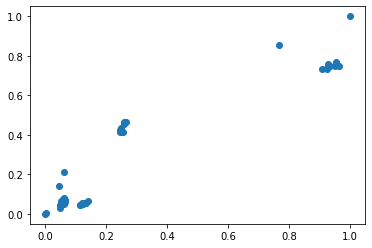

In [ ]:

plt.scatter(df1['matkat yön yli lkm tuhansia'], df1['yöpymiset lkm tuhansia'])
plt.show()


In [ ]:

# muutetaan muuttujanimet
travel = df1['matkat yön yli lkm tuhansia']
overnight = df1['yöpymiset lkm tuhansia']


In [ ]:

travel = np.array(travel).reshape(-1,1) # pitää olla numpyn 2D taulu
overnight = np.array(overnight).reshape(-1,1)
travel

array([[0.96537901],
       [0.14067055],
       [0.24854227],
       [0.06086006],
       [0.95663265],
       [0.13374636],
       [0.24453353],
       [0.04737609],
       [0.9085277 ],
       [0.12244898],
       [0.24599125],
       [0.05174927],
       [0.9271137 ],
       [0.11479592],
       [0.25400875],
       [0.05029155],
       [0.93476676],
       [0.13046647],
       [0.25364431],
       [0.05867347],
       [0.95116618],
       [0.12755102],
       [0.26567055],
       [0.05393586],
       [0.92565598],
       [0.11516035],
       [0.25911079],
       [0.0648688 ],
       [0.92747813],
       [0.12062682],
       [0.25765306],
       [0.06450437],
       [0.76895044],
       [0.06122449],
       [0.06122449],
       [0.00327988],
       [1.        ],
       [0.04992711],
       [0.0451895 ],
       [0.        ]])

**Otetaan käyttöön lineaarisen regression malli.**

In [ ]:

malli = linear_model.LinearRegression()
malli.fit(travel,overnight)

LinearRegression()

In [ ]:

# ennustetaan overnight -arvo kun travel -arvo on 0.8

overnight1 = np.full((1,1),0.8) # pitää olla numpyn 2D taulu
travel1 = malli.predict(overnight1)
travel1

array([[0.703306]])

**Piirretään regressiosuora**

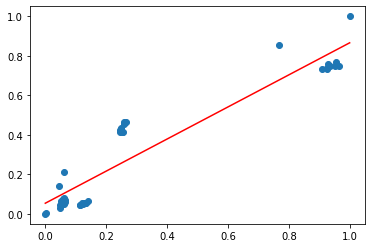

In [ ]:

# regressiosuora
# valittu suoralle alku 0 ja loppu 1 travel -arvojen perusteella

travel2 = np.linspace(0,1,2).reshape(-1,1)
overnight2 = malli.predict(travel2)
plt.plot(travel2, overnight2, color="red")
plt.scatter(travel, overnight)
plt.show()


**Laskettu RMSE ja R2 arvot.**

In [ ]:

from sklearn import metrics

overnight_hat = malli.predict(travel) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(overnight, overnight_hat)))
print('R2 value:', metrics.r2_score(overnight, overnight_hat))


Root Mean Squared Error: 0.10742490889219179
R2 value: 0.8789844616554054


**Malli sai hyvän R2 arvon 0.878**